# 1. Load Dataset

In [5]:
import json, pandas as pd

with open('src/interactions_poetry.json') as f:
	users = pd.DataFrame(json.loads(line) for line in f)

with open('src/books_poetry.json') as f:
	items = pd.DataFrame(json.loads(line) for line in f)

#display(users)
#display(items)

In [10]:
import networkx as nx
G = nx.Graph()

G.add_nodes_from(users['user_id'], type = 'user')
print('Num nodes:', G.number_of_nodes(), '. Num edges:', G.number_of_edges())
G.add_nodes_from(users['book_id'], type = 'book')
print('Num nodes:', G.number_of_nodes(), '. Num edges:', G.number_of_edges())

Num nodes: 377799 . Num edges: 0
Num nodes: 414313 . Num edges: 0


In [11]:
edges = [(row['user_id'], row['book_id']) for index, row in users.iterrows()]
G.add_edges_from(edges)
print('Num nodes:', G.number_of_nodes(), '. Num edges:', G.number_of_edges())

Num nodes: 414313 . Num edges: 2734350


# 2. Subgraph Visualization

In [60]:
import random
import matplotlib.pyplot as plt

stop = False
while(stop!=True):
      # Make a large subgraph
      rand_nodes_lg = random.sample(list(G.nodes()), 5000)
      sub_G_lg = G.subgraph(rand_nodes_lg)
      largest_cc_lg = max(nx.connected_components(sub_G_lg.to_undirected()), key=len)
      sub_G_lg = nx.Graph(sub_G_lg.subgraph(largest_cc_lg))
      
      if(sub_G_lg.number_of_edges()<150):
            continue

      # Make a smaller subgraph from the larger one
      rand_nodes_sm = random.sample(list(sub_G_lg.nodes()), 100)
      sub_G_sm = sub_G_lg.subgraph(rand_nodes_sm)
      largest_cc_sm = max(nx.connected_components(sub_G_sm.to_undirected()), key=len)
      sub_G_sm = nx.Graph(sub_G_sm.subgraph(largest_cc_sm))
      
      if(sub_G_sm.number_of_edges()>50):
            stop = True

print('Large subgraph Num nodes:', sub_G_lg.number_of_nodes(),
            '. Num edges:', sub_G_lg.number_of_edges())
print('Small subgraph Num nodes:', sub_G_sm.number_of_nodes(),
            '. Num edges:', sub_G_sm.number_of_edges())

Large subgraph Num nodes: 340 . Num edges: 374
Small subgraph Num nodes: 58 . Num edges: 62


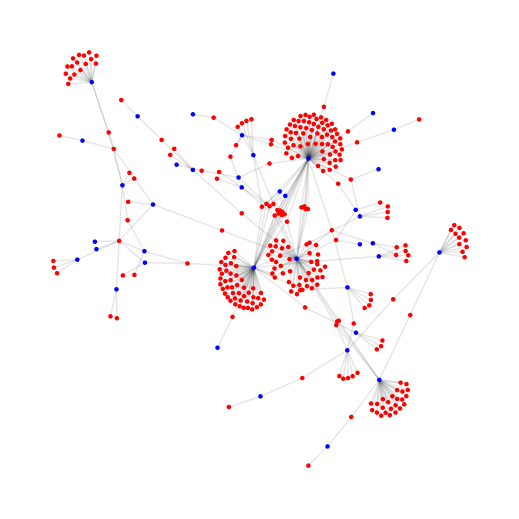

In [61]:
# Graph the large subgraph

# user : red
# #book: blue
color_map = {"user": [1,0,0], "book": [0,0,1]}

node_color = [color_map[attr["type"]] for (id, attr) in sub_G_lg.nodes(data=True)]
plt.figure(figsize=(5,5))
nx.draw(sub_G_lg,
        node_color=node_color,
        node_size = 5,
        width = 1,
        edge_color=(0, 0, 0, 0.1))

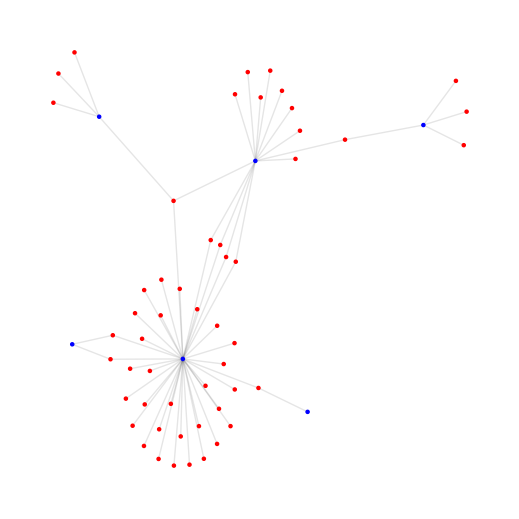

In [62]:
# Graph the subgraph of the small subgraph
node_color = [color_map[attr["type"]] for (id, attr) in sub_G_sm.nodes(data=True)]
plt.figure(figsize=(5,5))
nx.draw(sub_G_sm,
        node_color=node_color,
        node_size = 5,
        width = 1,
        edge_color=(0, 0, 0, 0.1))

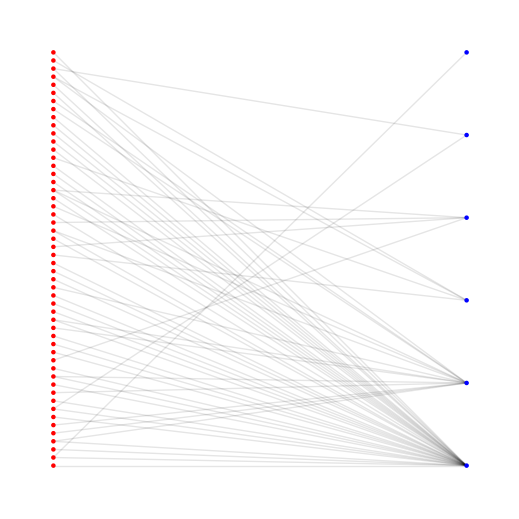

In [63]:
# Show the smaller subgraph as bipartite
top = nx.bipartite.sets(sub_G_sm)[0]
pos = nx.bipartite_layout(sub_G_sm, top)
plt.figure(figsize=(5,5))
nx.draw(sub_G_sm,
        pos=pos,
        node_color=node_color,
        node_size = 5,
        width = 1,
        edge_color=(0, 0, 0, 0.1))